# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from scipy import stats
import seaborn as sns
import math

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
driver = 'mysql+pymysql'
user = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
ip = '34.65.10.136'
database = 'employees'

conn_string = f'{driver}://{user}:{password}@{ip}/{database}'
conn = sqlalchemy.create_engine(conn_string)

Examine the `salaries` dataset using the `head` function below.

In [3]:
salaries = pd.read_sql_query('SELECT * FROM employees.employees_advanced;', conn)
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
Name                 33183 non-null object
Job Titles           33183 non-null object
Department           33183 non-null object
Full or Part-Time    33183 non-null object
Salary or Hourly     33183 non-null object
Typical Hours        8022 non-null float64
Annual Salary        25161 non-null float64
Hourly Rate          8022 non-null float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64


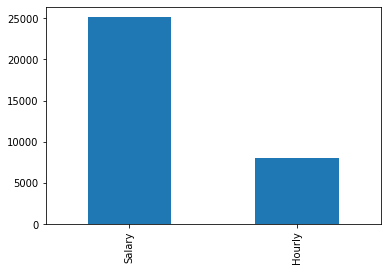

In [5]:
salaries['Salary or Hourly'].value_counts().plot(kind='bar')
print(salaries['Salary or Hourly'].value_counts())

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
salaries['Department'].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

In [7]:
salaries.groupby('Department').agg({'Name': 'count'})

,Name
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171
CITY CLERK,84


In [8]:
pd.pivot_table(salaries,index=["Department"],values=["Name"],aggfunc={"Name": "count"})

,Name
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171
CITY CLERK,84


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [9]:
mean = salaries['Hourly Rate'].mean()
std = salaries['Hourly Rate'].std()
n = 8022 # Hourly employees count
t = 1.96 # from t table for 95 % confidence interval

x1, x2 = (mean + ((t*std)/math.sqrt(n))), (mean - ((t*std)/math.sqrt(n)))
print(f"{x1} & {x2}\n")
print(f"From the numbers above we can clearly see that it is unlikely that the hourly workers are significantly different from $30/hr\nBecause with 95% confidence interval our confidence interval is from {x1} to {x2}")

33.053621955041194 & 32.52349347752137

From the numbers above we can clearly see that it is unlikely that the hourly workers are significantly different from $30/hr
Because with 95% confidence interval our confidence interval is from 33.053621955041194 to 32.52349347752137


In [10]:
hourly_employees = salaries[salaries['Salary or Hourly'] == 'Hourly']['Hourly Rate']
mean, sigma = np.mean(hourly_employees), np.std(hourly_employees)
conf_int = stats.norm.interval(0.95, loc=mean, scale=(sigma/math.sqrt(len(hourly_employees))))
print(conf_int)

(32.52351486943222, 33.053600563130345)


In [11]:
hourly = salaries['Hourly Rate'].dropna().reset_index(drop=True)
t, prob = stats.ttest_1samp(hourly, 30)

print(f'T-stat: {t}')
print(f'Probability (p-value): {prob}')
print('Because T-stat is higher than 1.96, this means that $30/hr is outside of our confidence interval of 95%.')

T-stat: 20.6198057854942
Probability (p-value): 4.3230240486229894e-92
Because T-stat is higher than 1.96, this means that $30/hr is outside of our confidence interval of 95%.


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [12]:
police_annual = salaries[salaries['Department'] == 'POLICE']['Annual Salary'].dropna().reset_index(drop=True)
t, prob = stats.ttest_1samp(police_annual, 86000)

print(f'T-stat: {t}')
print(f'Probability (p-value): {prob/2}') # We divided over two to get it for only one tail
print('Because T-stat is higher than 1.96, this means that $86000/year is outside of our confidence interval of 95%.')

T-stat: 3.081997005712994
Probability (p-value): 0.0010301701775482569
Because T-stat is higher than 1.96, this means that $86000/year is outside of our confidence interval of 95%.


Using the `crosstab` function, find the department that has the most hourly workers. 

In [24]:
#pd.pivot_table(salaries,index=["Department"],values=['Hourly Rate'],aggfunc={'Hourly Rate': "count"})

In [17]:
pd.crosstab(salaries['Department'], salaries['Salary or Hourly']).sort_values(by='Hourly', ascending = False)

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [31]:
department_hourly = salaries['Hourly Rate'].dropna().reset_index(drop=True)
t, prob = stats.ttest_1samp(department_hourly, 35)

print(f'T-stat: {t}')
print(f'Probability (p-value): {prob/2}')
print('Because T-stat is less than -1.96, this means that $35/hr is outside of our confidence interval of 95%.')

T-stat: -16.352363851001144
Probability (p-value): 1.8818444649254009e-59
Because T-stat is less than -1.96, this means that $35/hr is outside of our confidence interval of 95%.


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [41]:
department_hourly_mean = department_hourly.mean()
mean_standard_error = stats.sem(department_hourly)
n = (department_hourly.count())-1

stats.t.interval(0.95, n, department_hourly_mean, mean_standard_error)

(32.52345834488529, 33.05365708767727)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [42]:
police_annual_mean = police_annual.mean()
mean_standard_error_1 = stats.sem(police_annual)
n1 = (police_annual.count())-1

stats.t.interval(0.95, n1, police_annual_mean, mean_standard_error_1)

(86177.05631531784, 86795.77269094894)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [13]:
# Your code here:

